In [65]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import keras
import time


In [66]:
x_train = np.load("./Xtrain_Classification_Part1.npy")
y_train = np.load("./Ytrain_Classification_Part1.npy")
x_test = np.load("./Xtest_Classification_Part1.npy")

In [67]:
y_test = np.load("./Ytest_parsed.npy")
test_Y_one_hot = to_categorical(y_test)

In [68]:
x_train_reshaped = x_train.reshape((x_train.shape[0],50,50))
x_test_reshaped = x_test.reshape((x_test.shape[0],50,50))

x_train_reshaped = x_train_reshaped.reshape(-1, 50,50, 1)
x_test_reshaped = x_test_reshaped.reshape(-1, 50,50, 1)

x_train_reshaped = x_train_reshaped.astype('float32')
x_test_reshaped = x_test_reshaped.astype('float32')

In [69]:
x_train_reshaped = x_train_reshaped/255
x_test_reshaped = x_test_reshaped/255

In [70]:
train_Y_one_hot = to_categorical(y_train)

In [71]:
#train_X,valid_X,train_label,valid_label = train_test_split(x_train_reshaped, train_Y_one_hot, test_size=0.2, random_state=13)


In [72]:
#train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


In [73]:
batch_size = 64
epochs = 25
num_classes = 2

In [74]:
callback = EarlyStopping(monitor='val_accuracy', patience=8, mode="max" ,restore_best_weights=True)

In [75]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(50,50,1)))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
#model.add(LeakyReLU(alpha=0.1))   
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [76]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [77]:
#model_train = model.fit(x_train_reshaped, train_Y_one_hot,validation_split=0.1, shuffle=True, batch_size=batch_size,epochs=epochs,callbacks=[callback],verbose=1)
model_train = model.fit(x_test_reshaped, test_Y_one_hot, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test_reshaped, test_Y_one_hot),callbacks=[callback])

Epoch 1/25
19/19 [==============================] - 6s 318ms/step - loss: 0.7226 - accuracy: 0.5430 - val_loss: 0.6900 - val_accuracy: 0.4871
Epoch 2/25
19/19 [==============================] - 6s 298ms/step - loss: 0.6502 - accuracy: 0.6229 - val_loss: 0.6079 - val_accuracy: 0.6572
Epoch 3/25
19/19 [==============================] - 5s 258ms/step - loss: 0.6406 - accuracy: 0.6409 - val_loss: 0.6340 - val_accuracy: 0.6649
Epoch 4/25
19/19 [==============================] - 5s 250ms/step - loss: 0.6120 - accuracy: 0.6572 - val_loss: 0.6139 - val_accuracy: 0.6744
Epoch 5/25
19/19 [==============================] - 5s 256ms/step - loss: 0.6032 - accuracy: 0.6753 - val_loss: 0.6012 - val_accuracy: 0.6624
Epoch 6/25
19/19 [==============================] - 5s 253ms/step - loss: 0.6034 - accuracy: 0.6641 - val_loss: 0.5853 - val_accuracy: 0.6916
Epoch 7/25
19/19 [==============================] - 5s 256ms/step - loss: 0.5834 - accuracy: 0.6924 - val_loss: 0.5733 - val_accuracy: 0.7088
Epoch 

In [78]:
y_test_predicted = model.predict(x_test_reshaped)

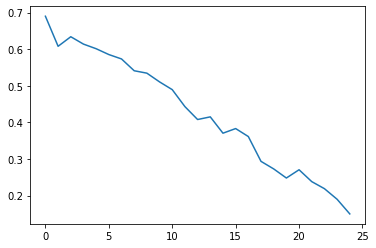

In [79]:
plt.plot(model_train.history["val_loss"])

In [80]:
model_train.history["val_accuracy"][-9]



0.8591065406799316

In [81]:
k=0
for i in range(y_test.shape[0]):
    if np.argmax(y_test_predicted[i])==0:
        if(y_test[i]==0):
            k+=1
    else:
        if(y_test[i]==1):
            k+=1
print(str(k)+"/"+str(y_test.shape[0]))
print(str(k/y_test.shape[0]*100))


1110/1164
95.36082474226805


In [82]:
#for i in range(y_test.shape[0]):
#    if np.argmax(y_test_predicted[i])==0:
#        print("male")
#    else:
#        print("female")
#    plt.imshow(x_test_reshaped[i])#,cmap="Greys"
#    plt.show()


In [83]:
predictor= np.array([])
b = "%.2f" % round(model_train.history["val_accuracy"][-9]*100,2)
for i in range(y_test_predicted.shape[0]):
    predictor = np.append(predictor,np.argmax(y_test_predicted[i]))

np.save("Ytest_Classification_" + str(b)+".npy",predictor)
    

## submit vector of labels(1 or 0)
## search other options (classifiers) besides cnn and mlp 
### (try svm, hyperparameters linear svm - C look at the weight vector (eye region and mouth weights will influence on the ethnicity and gender classification), nonlinear svm - C,gamma(rbf))
